In [7]:
# I worked on this for a while but had a TON of difficulty with coding this time around, I should have started 
# and done more of the prep work and ran into a lot of bugs I couldn't best

import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
import GPy
%matplotlib inline
print 'started'



#loading in files for data
years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % 
            y for y in years]

usecols = [1, 2, 8]


data = [np.loadtxt(f, usecols=usecols) for f in files]
test_data = []
old_data = np.vstack(data)
train_data = ['index', 'date', 'time', 'temp_cel']
count = 0

#creating test and train columns per attribute
dates_tr = []
time_tr = []
temp_cel_tr = []

dates_te = []
time_te = []
temp_cel_te = []

print 'done'




started
done


# Inputting Data into Lists, transorming dates, cleaning, and segmenting out training and test

In [8]:
print 'started'
num_train_in = 100000
num_test_in = 20000

#iterating through the data, transitioning the date strings to datetime and then ordinal - the ordinal of that year
#to get a day of year value. Finally if the value is before 2016 I add it to the train data or if not I add to test
for row in old_data[0:num_train_in]:
	count += 1
	date = row[0]
	new_date = pd.to_datetime(date, format='%Y%m%d')
	new_ordy = new_date.toordinal() - pd.to_datetime(str(new_date.year) + '0101', format='%Y%m%d').toordinal()
	n_row = [count, new_ordy, row[1], row[2]]

	if new_date < pd.to_datetime('20160101', format='%Y%m%d'):
		train_data.append(n_row)
		dates_tr.append(new_ordy)
		time_tr.append(np.floor_divide(row[1], 100) * 60 + np.mod(row[1], 100))
		temp_cel_tr.append(row[2])
	else:
        
		test_data.append(n_row)
		dates_te.append(new_ordy)
		time_te.append(np.floor_divide(row[1], 100) * 60 + np.mod(row[1], 100))
		temp_cel_te.append(row[2])
        

        
#this is just to use while I don't upload / transform all the data (so I get some test values)
for row in old_data[-num_test_in:]:
	count += 1
	date = row[0]
	new_date = pd.to_datetime(date, format='%Y%m%d')
	new_ordy = new_date.toordinal() - pd.to_datetime(str(new_date.year) + '0101', format='%Y%m%d').toordinal()
	n_row = [count, new_ordy, row[1], row[2]]

	if new_date < pd.to_datetime('20160101', format='%Y%m%d'):
		train_data.append(n_row)
		dates_tr.append(new_ordy)
		time_tr.append(np.floor_divide(row[1], 100) * 60 + np.mod(row[1], 100))
		temp_cel_tr.append(row[2])
	else:
        
		test_data.append(n_row)
		dates_te.append(new_ordy)
		time_te.append(np.floor_divide(row[1], 100) * 60 + np.mod(row[1], 100))
		temp_cel_te.append(row[2])

print 'update 1 '


started
update 1 


# Transitioning Data to DF

In [9]:
print 'started'

#transition the data to dataframes
train_df = pd.DataFrame()
train_df['date'] = dates_tr
train_df['time'] = time_tr
train_df['temp'] = temp_cel_tr
min_tot = train_df.date * 1435 + train_df.time
train_df['tot_min'] = min_tot


#removing non-values for data
train_df.shape
train_df = train_df[train_df.temp != -9999.0]
train_df.shape

#setting test values and removing nonvalues 
test_df = pd.DataFrame()
test_df['date'] = dates_te
test_df['time'] = time_te
test_df['temp'] = temp_cel_te
min_tot = test_df.date * 1435 + test_df.time
test_df['tot_min'] = min_tot


test_df.shape
test_df = test_df[test_df.temp != -9999.0]
test_df.shape

#print train_df.head

# print x, y

new_x = train_df.as_matrix(columns=train_df.columns[-1:])
new_y = train_df.as_matrix(columns=train_df.columns[2:3])



x = np.array(new_x)
y = np.array(new_y)

print x
print x.shape

print 'update 2'


started
[[  5.00000000e+00]
 [  1.00000000e+01]
 [  1.50000000e+01]
 ..., 
 [  4.98255000e+05]
 [  4.98260000e+05]
 [  4.98265000e+05]]
(99848, 1)
update 2


In [31]:
new_te_x = test_df.as_matrix(columns=test_df.columns[0:2])
new_te_y = test_df.as_matrix(columns=test_df.columns[2:3])


new_te_x = np.array(new_x)
new_te_y = np.array(new_y)

print test_df
print new_te_x

print 'finish'

       date    time  temp   tot_min
0       296   805.0   9.8  425565.0
1       296   810.0  10.1  425570.0
2       296   815.0  10.1  425575.0
3       296   820.0   9.9  425580.0
4       296   825.0  10.2  425585.0
5       296   830.0  10.1  425590.0
6       296   835.0  10.1  425595.0
7       296   840.0  10.2  425600.0
8       296   845.0  10.2  425605.0
9       296   850.0  10.2  425610.0
10      296   855.0  10.1  425615.0
11      296   860.0  10.2  425620.0
12      296   865.0  10.1  425625.0
13      296   870.0  10.1  425630.0
14      296   875.0  10.3  425635.0
15      296   880.0  10.5  425640.0
16      296   885.0  10.5  425645.0
17      296   890.0  10.6  425650.0
18      296   895.0  10.5  425655.0
19      296   900.0  10.3  425660.0
20      296   905.0  10.4  425665.0
21      296   910.0  10.4  425670.0
22      296   915.0  10.6  425675.0
23      296   920.0  10.5  425680.0
24      296   925.0  10.5  425685.0
25      296   930.0  10.6  425690.0
26      296   935.0  10.7  4

## Setting the Kernels

In [4]:
# print 'started'

k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0) \
    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.19**2)  # noise terms
kernel_gpml = k1 + k2 + k3 + k4

print 'done'

done


## *Fitting the Sparse Gaussian Process*

start
tot time 0.700870037079

Name : sparse_gp
Objective : 296773.293364
Number of Parameters : 33
Number of Optimization Parameters : 3
Updates : True
Parameters:
  sparse_gp.               |          value  |  constraints  |  priors
  inducing_inputs          |        (30, 1)  |     fixed     |        
  rbf.variance             |  4.05058652984  |      +ve      |        
  rbf.lengthscale          |  13231.4159615  |      +ve      |        
  Gaussian_noise.variance  |   19.467498275  |      +ve      |        


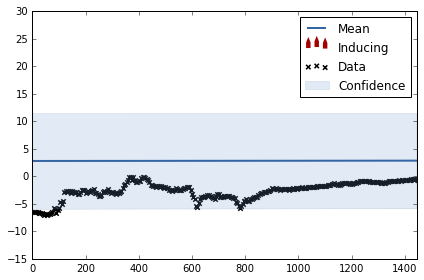

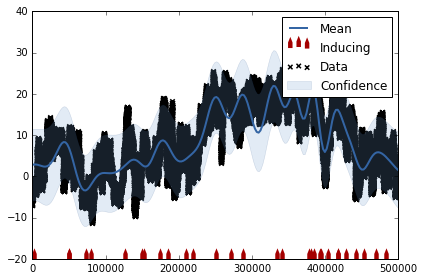

In [35]:
print 'start'

#General kernel
k1 = GPy.kern.RBF(1, lengthscale = 2000)

# #kernel to represent seasonality
# kern = GPy.kern.Poly(1)

# #kernel to represent daily variance 
# k2 = GPy.kern.PeriodicMatern32(1, period = 1440)

# kernel = k1 + kern + k2
    
k = k1 

noise_var = 0.05
import time

start = time.time()
m = GPy.models.SparseGPRegression(x, y, kernel = k, num_inducing = 30)
print 'tot time',time.time() - start
m.inducing_inputs.fix()
m.optimize('bfgs')
m.plot([0,1444])
m.plot([0,500000])
print m


start

Name : sparse_gp
Objective : 302645.273373
Number of Parameters : 43
Number of Optimization Parameters : 43
Updates : True
Parameters:
  sparse_gp.               |          value  |  constraints  |  priors
  inducing_inputs          |        (20, 2)  |               |        
  rbf.variance             |  1.19136863062  |      +ve      |        
  rbf.lengthscale          |  64.8668150611  |      +ve      |        
  Gaussian_noise.variance  |  24.3310038639  |      +ve      |        


 /Applications/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


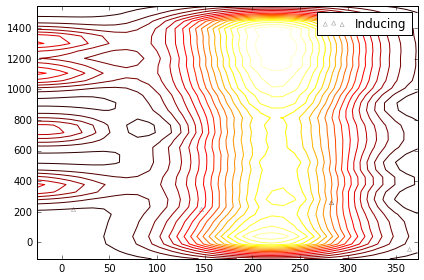

In [6]:
print 'start'

num_ind = 20
full_k = GPy.kern.RBF(input_dim=2, lengthscale = 100)
noise_var = 0.05


new_x_train = train_df[['date','time']].as_matrix()
x_test = test_df[['date', 'time']].as_matrix()

full_model_opt = GPy.models.SparseGPRegression(new_x_train, y, kernel = full_k, num_inducing=num_ind)
# days_model.inducing_inputs.fix()
full_model_opt.optimize()
full_model_opt.plot(plot_data = False)
print full_model_opt



In [32]:
new_x_train = test_df[['date','time']].as_matrix()
x_test = test_df[['date', 'time']].as_matrix()

## *Measuring the model*

In [33]:
# full_model_opt.plot(plot_data = False, projection = "3d")

from sklearn.metrics import mean_squared_error

pred_full = full_model_opt.predict(x_test)
mean_squared_error(new_te_y, pred_full[0])

19967
99848
